In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 24.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

# Membership Defintion

In [3]:
x_temp = np.arange(16, 31, 1)

In [4]:
temp_cool = fuzz.trapmf(x_temp, [16, 16, 18, 22])
temp_warm = fuzz.gaussmf(x_temp, 24, 2)
temp_hot = fuzz.trimf(x_temp, [26, 30, 30])

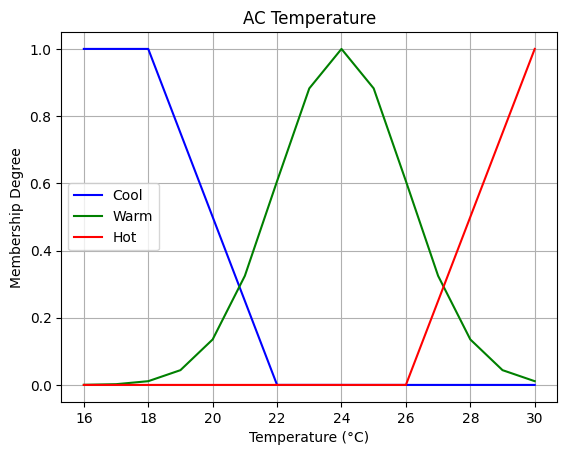

In [5]:
plt.figure()

plt.plot(x_temp, temp_cool, 'b', label='Cool')
plt.plot(x_temp, temp_warm, 'g', label='Warm')
plt.plot(x_temp, temp_hot, 'r', label='Hot')

plt.title('AC Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Membership Degree')
plt.legend()
plt.grid(True)

# Washing Machine

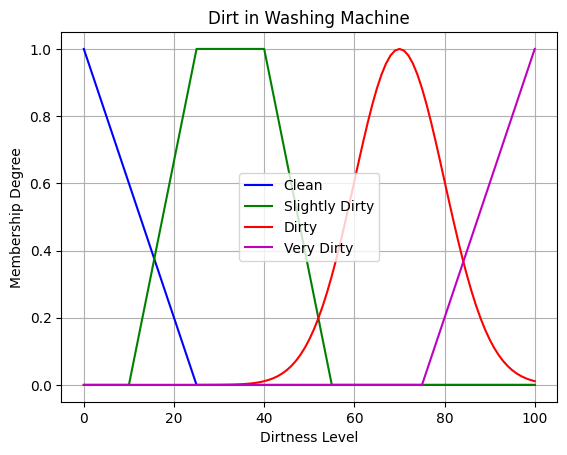

In [9]:
x_dirt = np.arange(0, 101, 1)

dirt_clean = fuzz.trimf(x_dirt, [0, 0, 25])
dirt_slight = fuzz.trapmf(x_dirt, [10, 25, 40, 55])
dirt_dirty = fuzz.gaussmf(x_dirt, 70, 10)
dirt_very_dirty = fuzz.trimf(x_dirt, [75, 100, 100])

plt.figure()
plt.xlabel('Dirtness Level')
plt.ylabel('Membership Degree')
plt.plot(x_dirt, dirt_clean, 'b', label='Clean')
plt.plot(x_dirt, dirt_slight, 'g', label='Slightly Dirty')
plt.plot(x_dirt, dirt_dirty, 'r', label='Dirty')
plt.plot(x_dirt, dirt_very_dirty, 'm', label='Very Dirty')
plt.title('Dirt in Washing Machine')
plt.legend()
plt.grid(True)
plt.show()

# Fuzzy Controller for a washing machine

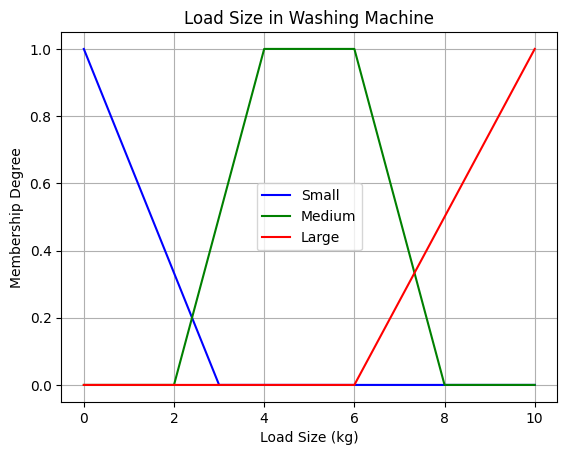

In [10]:
x_load = np.arange(0, 11, 1)
load_small = fuzz.trimf(x_load, [0, 0, 3])
load_medium = fuzz.trapmf(x_load, [2, 4, 6, 8])
load_large = fuzz.trimf(x_load, [6, 10, 10])

plt.figure()
plt.xlabel('Load Size (kg)')
plt.ylabel('Membership Degree')
plt.plot(x_load, load_small, 'b', label='Small')
plt.plot(x_load, load_medium, 'g', label='Medium')
plt.plot(x_load, load_large, 'r', label='Large')
plt.title('Load Size in Washing Machine')
plt.legend()
plt.grid(True)
plt.show()


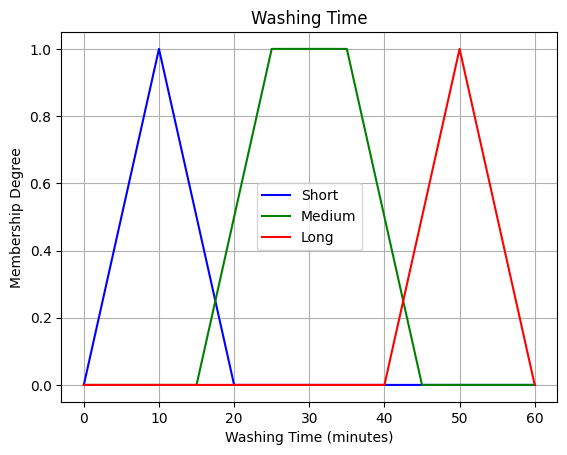

In [11]:
x_time = np.arange(0, 61, 1)
time_short = fuzz.trimf(x_time, [0, 10, 20])
time_medium = fuzz.trapmf(x_time, [15, 25, 35, 45])
time_long = fuzz.trimf(x_time, [40, 50, 60])

plt.figure()
plt.xlabel('Washing Time (minutes)')
plt.ylabel('Membership Degree')
plt.plot(x_time, time_short, 'b', label='Short')
plt.plot(x_time, time_medium, 'g', label='Medium')
plt.plot(x_time, time_long, 'r', label='Long')
plt.title('Washing Time')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
dirt = ctrl.Antecedent(x_dirt, 'dirt')
load = ctrl.Antecedent(x_load, 'load')
time = ctrl.Consequent(x_time, 'time')

dirt['clean'] = dirt_clean
dirt['slightly_dirty'] = dirt_slight
dirt['dirty'] = dirt_dirty
dirt['very_dirty'] = dirt_very_dirty

load['small'] = load_small
load['medium'] = load_medium
load['large'] = load_large

time['short'] = time_short
time['medium'] = time_medium
time['long'] = time_long

rule1 = ctrl.Rule(dirt['clean'] & load['small'], time['short'])
rule2 = ctrl.Rule(dirt['slightly_dirty'] & load['medium'], time['medium'])
rule3 = ctrl.Rule(dirt['dirty'] & load['large'], time['long'])
rule4 = ctrl.Rule(dirt['very_dirty'] & load['large'], time['long'])
rule5 = ctrl.Rule(dirt['slightly_dirty'] & load['large'], time['long'])
rule6 = ctrl.Rule(dirt['clean'] & load['large'], time['medium'])
rule7 = ctrl.Rule(dirt['very_dirty'] & load['small'], time['medium'])


Recommended Washing Time: 49.99999999999999 minutes


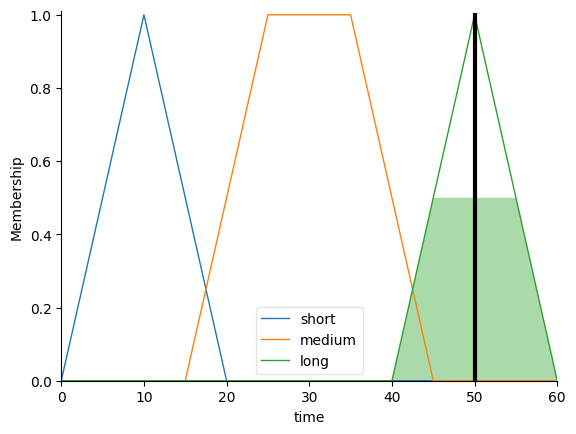

In [13]:
washing_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
washing_sim = ctrl.ControlSystemSimulation(washing_ctrl)

washing_sim.input['dirt'] = 80
washing_sim.input['load'] = 8

washing_sim.compute()

print(f"Recommended Washing Time: {washing_sim.output['time']} minutes")

time.view(sim=washing_sim)
plt.show()
